In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep

C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\kenne\pythonfolder\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
'''
Function takes as input the phonon frequencies (x_data) and matrix elements (y_data).
Function partitions the phonon frequencies into 1 meV bins, and calculates the average
frequency and matrix element in each bin.
'''
def partition_and_average(x_data, y_data):
    N = 190
    x_bins = np.zeros(N)
    y_bins = np.zeros(N)
    count = np.zeros(N)
    x_avgs = np.array([])
    y_avgs = np.array([])
    
    for i in range(N):
        for j in range(len(x_data)):
            if x_data[j] >= i and x_data[j] < i+1:
                x_bins[i] += x_data[j]
                y_bins[i] += y_data[j]
                count[i] += 1
    for i in range(N):
        if count[i] != 0:
            x_avg = x_bins[i] / count[i]
            x_avgs = np.append(x_avgs, x_avg)
            y_avg = y_bins[i] / count[i]
            y_avgs = np.append(y_avgs, y_avg)
    
    return (x_avgs, y_avgs)

In [4]:
# Run once and then comment out. The 22.dat file is read and the relevant data is
# saved to a text file for easy access when you want to rerun the notebook.

#C2Cn_freq = np.loadtxt("22.dat", usecols=5, dtype='float') # 5th column are the phonon frequencies
#C2Cn_g = np.loadtxt("22.dat", usecols=6, dtype='float') # 6th column are the matrix elements
#C2Cn_freq_avg, C2Cn_g_avg = partition_and_average(C2Cn_freq, C2Cn_g)
#np.savetxt('C2Cn_freq_avg.txt', C2Cn_freq_avg) 
#np.savetxt('C2Cn_g_avg.txt', C2Cn_g_avg)

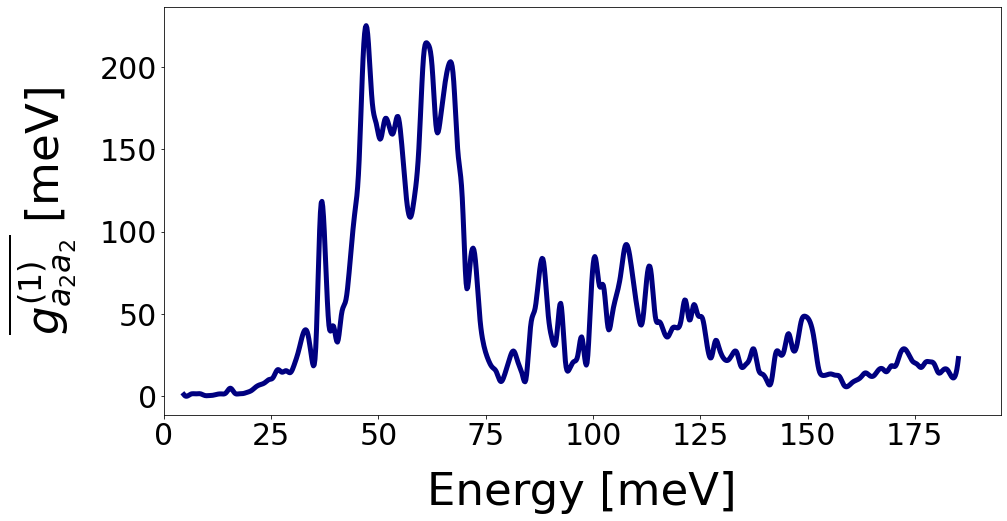

In [5]:
# Load the data from the previously written text files
C2Cn_freq_avg = np.loadtxt('C2Cn_freq_avg.txt') 
C2Cn_g_avg = np.loadtxt('C2Cn_g_avg.txt')

# The low energy phonons have matrix elements that diverge. I believe this is due
# to artifical dispersion of the defect band. I saw this issue for the NV- center
# and it was only present for interband transitions where two bands, that were supposed
# to be degenerate, were artifically split. The theory of Plakhotnik does not include
# contributions from resonant phonon modes, so we ignore them.
C2Cn_freq_avg = C2Cn_freq_avg[4:] 
C2Cn_g_avg = C2Cn_g_avg[4:]

# Fit a curve to the matrix elements as a function of phonon frequency
freq_fit_C2Cn = np.linspace(np.min(C2Cn_freq_avg), np.max(C2Cn_freq_avg),1000)
g_func_C2Cn = splrep(C2Cn_freq_avg, C2Cn_g_avg)
g_fit_C2Cn = splev(freq_fit_C2Cn, g_func_C2Cn)

# plot
fig = plt.figure(figsize=(15,7.5))
plt.xlim(0,195)
#plt.ylim(-10,300)
plt.xlabel('Energy [meV]', fontsize=45, labelpad=20)
plt.ylabel('$\overline{g_{a_2 a_2}^{(1)}}$ [meV]', fontsize=45, labelpad=20)
plt.tick_params(labelsize=30)

plt.plot(freq_fit_C2Cn, np.abs(g_fit_C2Cn), lw=5, label='6x6x1', c='navy')

plt.savefig('C2Cn_matrix_elements.png', bbox_inches = 'tight')
plt.show()